# Healthcare Analytics - Understanding Trends in Healthcare Data 


In this project, data will be pulled from: https://www.kaggle.com/datasets/prasad22/healthcare-dataset?resource=download 

To preface, it is important to note that the analyzed data is synthetic and created with the intention to imitate real healthcare data. We begin by importing the necessary libraries.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('healthcare_dataset.csv')

# General statistics and information 

In [10]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

Here, we see that the given dataset contains 55,500 entries and 15 columns, with no missing values. 

The data contains both quantitative and categorical data, and the bottom section of the output describes the mean, standard deviation, and quartiles of the quantitative columns.

# Identifying Potential Issues and Cleaning the Data 

There are a few potential issues and precautions that we will address when considering the data's statistics:

1. The minimum billing amount is -2008.492140. A negative billing amount is atypical, and raises attention to the impact of negative billing amounts on the data.
2. Potential outliers considering the size of the dataset.
3. Ensure no presence of duplicates.
4. Ensure that there are no inconsistencies in the types of data in the categorical columns.
5. Columns using date-related data should be of datetime type, not object type.

# Negative Billing Amounts

In [15]:
df[df['Billing Amount'] < 0] 

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
132,ashLEy ERIcKSoN,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,"and Johnson Moore, Branch",Aetna,-502.507813,376,Urgent,2019-11-23,Penicillin,Normal
799,CHRisTOPHer wEiss,49,Female,AB-,Asthma,2023-02-16,Kelly Thompson,Hunter-Hughes,Aetna,-1018.245371,204,Elective,2023-03-09,Penicillin,Inconclusive
1018,AsHley WaRnER,60,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.364925,426,Elective,2022-01-11,Ibuprofen,Normal
1421,JAY galloWaY,74,Female,O+,Asthma,2021-01-20,Debra Everett,Group Peters,Blue Cross,-109.097122,381,Emergency,2021-02-09,Ibuprofen,Abnormal
2103,josHUa wilLIamSon,72,Female,B-,Diabetes,2021-03-21,Wendy Ramos,"and Huff Reeves, Dennis",Blue Cross,-576.727907,369,Urgent,2021-04-17,Aspirin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52894,JosEPh cOx,23,Male,AB-,Diabetes,2019-10-13,Peter Smith,Inc Ward,Blue Cross,-353.865186,271,Elective,2019-10-25,Lipitor,Inconclusive
53204,AsHley WaRnER,55,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.364925,426,Elective,2022-01-11,Ibuprofen,Normal
53232,dAnIel dRaKe,68,Female,B+,Hypertension,2020-04-24,Brett Ray,Carr Ltd,Aetna,-591.917419,426,Elective,2020-04-26,Lipitor,Abnormal
54136,DR. micHaEl MckAy,64,Male,O+,Cancer,2019-05-31,Dawn Navarro,"Mcconnell and Rios, Clark",UnitedHealthcare,-199.663795,122,Urgent,2019-06-12,Ibuprofen,Abnormal


We can see that there are 108 patients with negative billing amounts. Before proceeding by cleaning any of the data, we will check if there are any trends related to the other categories that are shared among the patients with negative billing amounts.

In [18]:
negative_billing_df = df[df['Billing Amount'] < 0]
negative_billing_df.groupby('Admission Type').size()

Admission Type
Elective     37
Emergency    33
Urgent       38
dtype: int64

In [19]:
negative_billing_df.groupby('Medical Condition').size()

Medical Condition
Arthritis       11
Asthma          18
Cancer          19
Diabetes        20
Hypertension    21
Obesity         19
dtype: int64

From the above distribution, there does not appear to be an overwhelming admission type or medical condition shared by those with negative billing amounts. To check a few more possible correlations, we can consider the distance between these patients' admission date and discharge date, as well as any particular doctors, hospitals, or insurance providers. Notice that by checking the distance between admission/discharge dates, we first must convert these to datetime objects (Objective #5 as listed above).

In [20]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

df['Discharge_to_Admission_Days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

negative_billing_df = df[df['Billing Amount'] < 0]
negative_billing_df[['Discharge_to_Admission_Days', 'Billing Amount']].describe()

,Discharge_to_Admission_Days,Billing Amount
count,108.000000,108.000000
mean,15.629630,-499.301242
std,8.723791,426.463202
min,1.000000,-2008.492140
25%,8.000000,-792.084802
50%,15.500000,-369.093816
75%,23.000000,-153.079565
max,30.000000,-23.866729


In [26]:
#In comparison to the whole dataset
df[['Discharge_to_Admission_Days', 'Billing Amount']].describe()

,Discharge_to_Admission_Days,Billing Amount
count,55500.000000,55500.000000
mean,15.509009,25539.316097
std,8.659600,14211.454431
min,1.000000,-2008.492140
25%,8.000000,13241.224652
50%,15.000000,25538.069376
75%,23.000000,37820.508436
max,30.000000,52764.276736


In [21]:
negative_billing_df.groupby('Insurance Provider').size()

Insurance Provider
Aetna               27
Blue Cross          16
Cigna               24
Medicare            22
UnitedHealthcare    19
dtype: int64

In [22]:
negative_billing_df.groupby('Hospital').size()

Hospital
Aguilar Inc                      1
Anderson-Ball                    1
Anderson-Moore                   1
Armstrong LLC                    1
Ayers-Smith                      1
                                ..
and Rosales, Macdonald Hanson    1
and Sons Burns                   1
and Wade, Huffman Arnold         2
and Wagner, Lee Klein            2
and Wright, Pham Nguyen          1
Length: 96, dtype: int64

In [23]:
negative_billing_df.groupby('Doctor').size()

Doctor
Adam Pitts         1
Alicia Thompson    1
Allen Mcgrath      1
Amanda Ramirez     1
Amber Ochoa        1
                  ..
Tracy Brown        1
Tracy Smith        1
Vincent Cox        1
Wendy Ramos        1
William Krause     2
Length: 96, dtype: int64

After examining the distribution of these negative billing amounts in relation to other variables within the dataset (such as admission types, dates, insurance providers, etc.), there do not appear to be any significant trends for patients with negative billing amounts. As such, the negative billing values will remain in the data, but the minimum value of -2008.492140 seems to be a potential outlier that will be investigated further in the following section.

# Potential Outliers in Numerical Columns

We will use a box plot, z-scores, and the interquartile range to identify any outliers in the numerical columns of data. Below, we will use a z-score of 3 as the cutoff to classify outliers.

In [41]:
import seaborn as sns
from scipy.stats import zscore
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = df[numerical_columns].apply(zscore)
outliers = (abs(z_scores) > 3)
print(outliers.sum())

Age                            0
Billing Amount                 0
Room Number                    0
Discharge_to_Admission_Days    0
dtype: int64


In [47]:
outliercount = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lowerbd = Q1 - 1.5*IQR
    upperbd = Q3 + 1.5*IQR

    outliers = df[(df[column] < lowerbd) | (df[column] > upperbd)]

    outliercount[column] = outliers.shape[0]

print(outliercount)

{'Age': 0, 'Billing Amount': 0, 'Room Number': 0, 'Discharge_to_Admission_Days': 0}


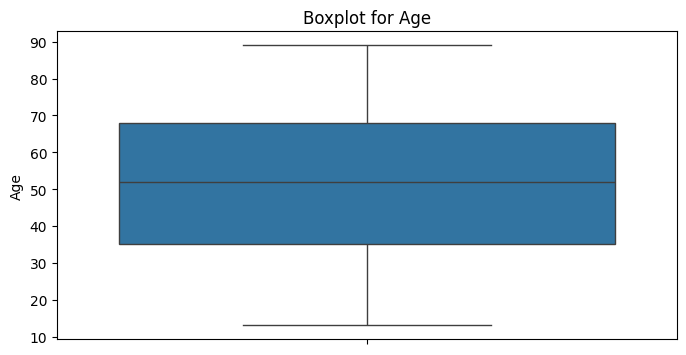

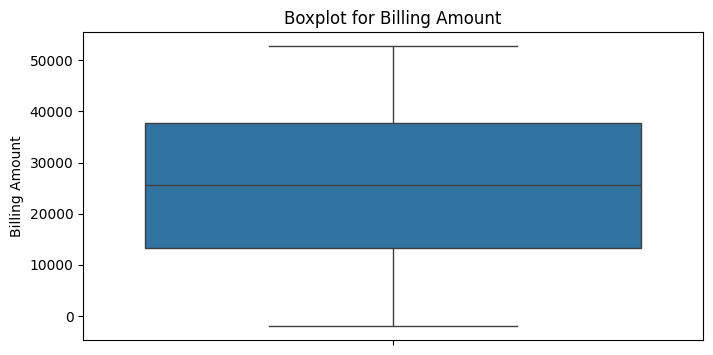

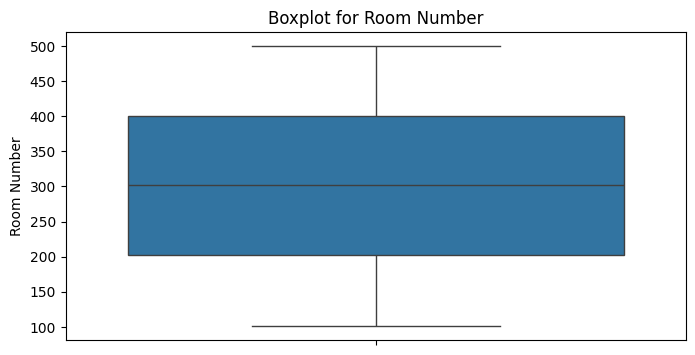

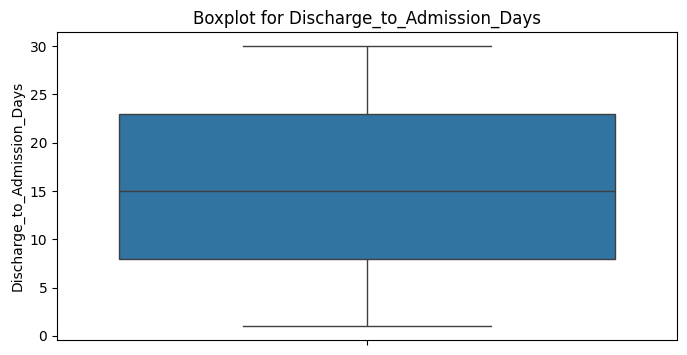

In [50]:
for column in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

From the above analysis with the use of z-scores, IQR calculations, and boxplots to visualize the data, we conclude that there are no outliers in the data. Considering that the data used is synthetic, it is possible that the data is idealized and purposely excludes outliers. We can also conclude that the minimum value in "Billing Amounts" was not an outlier, even though it raised attention initally. 

# Checking for Duplicates

Next, we want to make sure that the data does not have any duplicates that may be affecting distributions and statistics. To do so, we run the following code:

In [58]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
                     Name  Age  Gender Blood Type Medical Condition  \
50023        Samuel joYCe   56    Male         O+         Arthritis   
50040    KIMBErly vasqueZ   26    Male         A-           Obesity   
50055      SCoTT tHOrNton   55  Female         B-           Obesity   
50070         wiLliam LEe   27  Female         O+         Arthritis   
50078  chRistOPheR NoRrIs   38    Male        AB-         Arthritis   
...                   ...  ...     ...        ...               ...   
55461      connOR coMPTon   63    Male         A+            Asthma   
55462       alYSsA mIlLER   35  Female         A-          Diabetes   
55464        ChRIs huGHeS   35  Female        AB-           Obesity   
55484     keNNEtH alvarez   80    Male         O+            Cancer   
55491       lInDA grIFfin   47  Female         O+           Obesity   

      Date of Admission             Doctor                    Hospital  \
50023        2022-11-03     Krista Hartman              T

In [59]:
df = df.drop_duplicates()
print(f'Rows left after dropping duplicates: {df.shape[0]}')

Rows left after dropping duplicates: 54966


After dropping duplicates, we can see that 34 rows were removed. The "534 rows" at the bottom of the previous output were not all exact duplicates, and could have been rows with some duplicate columns, but this is natural since it is likely certain values/results would be the same across different patients. We wish to remove all the rows that are exact duplicates, which the previous block of code has taken care of.

# Exploring Potential Inconsistencies in Categorial Columns

Now that we have checked for outliers in the quantitative columns, we wish to verify that the categorical columns such as gender, blood type, doctor, admission type, etc. have consistent values in the rows. 

In [63]:
expected_values = {
    "Gender": ["Male", "Female"],
    "Blood Type": ["A-", "A+", "B-", "B+", "AB-", "AB+", "O-", "O+"],
    "Medical Condition": ["Cancer", "Obesity", "Diabetes", "Asthma", "Hypertension", "Arthritis"],
    "Doctor": None,  
    "Hospital": None,  
    "Insurance Provider": ["Blue Cross", "Medicare", "Aetna", "UnitedHealthcare", "Cigna"],
    "Admission Type": ["Urgent", "Emergency", "Elective"],
    "Medication": ["Paracetamol", "Ibuprofen", "Aspirin", "Penicillin", "Lipitor"],
    "Test Results": ["Normal", "Inconclusive", "Abnormal"]
}

def check_invalid_values(column, expected_list):
    if expected_list is None:
        return []  # Skip if there's no predefined expected list (e.g., Doctor, Hospital)
    invalid_values = set(column) - set(expected_list)
    return list(invalid_values)

for column, expected_list in expected_values.items():
    invalid_values = check_invalid_values(df[column], expected_list)
    if invalid_values:
        print(f"Invalid values in '{column}':")
        print(invalid_values)
    else:
        print(f"No invalid values found in '{column}'.")

No invalid values found in 'Gender'.
No invalid values found in 'Blood Type'.
No invalid values found in 'Medical Condition'.
No invalid values found in 'Doctor'.
No invalid values found in 'Hospital'.
No invalid values found in 'Insurance Provider'.
No invalid values found in 'Admission Type'.
No invalid values found in 'Medication'.
No invalid values found in 'Test Results'.


From the above code, we have verified that there are no inconsistent values within the categorical columns, and we can proceed without worrying about them.

As a reminder, the date of admission and discharge date columns were converted from object type to datetime when working with the negative billing amounts, so this has been successfully accounted for.

# Linear Regression Model - Age vs Obesity Diagnosis 